In [9]:
import numpy as np
import matplotlib.pyplot as plt

from hcipy import *
from hcipy.mode_basis import zernike_ansi

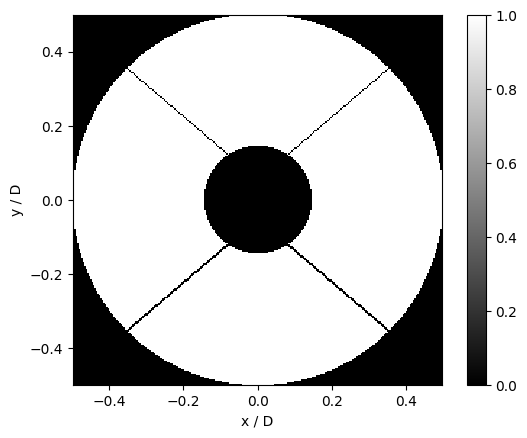

In [10]:
pupil_grid = make_pupil_grid(256)

telescope_pupil_generator = make_magellan_aperture(normalized=True)

telescope_pupil = telescope_pupil_generator(pupil_grid)

im = imshow_field(telescope_pupil, cmap='gray')
plt.colorbar()
plt.xlabel('x / D')
plt.ylabel('y / D')
plt.show()

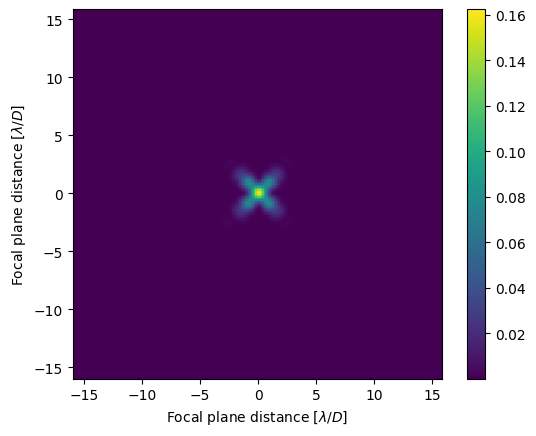

In [18]:
phase = zernike_ansi(3)(pupil_grid)
aberration = np.exp(1j * 1.0 * phase)
wavefront = Wavefront(telescope_pupil * aberration)

focal_grid = make_focal_grid(q=8, num_airy=16)
prop = FraunhoferPropagator(pupil_grid, focal_grid)

focal_image = prop.forward(wavefront)

imshow_field(focal_image.intensity)
plt.xlabel('Focal plane distance [$\lambda/D$]')
plt.ylabel('Focal plane distance [$\lambda/D$]')
plt.colorbar()
plt.show()
